In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import sklearn

import tensorflow as tf
import tensorflow.keras as keras

In [2]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [3]:
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [4]:
x_train_reshape = x_train.reshape(x_train.shape[0]*x_train.shape[1], x_train.shape[2])

In [5]:
y_train_reshape = y_train.reshape(5000,523,1)

In [6]:
y_test_reshape = y_test.reshape(y_test.shape[0]*y_test.shape[1], y_test.shape[2],1)

In [7]:
# Isolate validation data
# Create a list of random integers between 0 and 5,000
num_val_samples = 1000

shuffle_indices = random.sample(range(0,5000), num_val_samples)

# Train images with random indices become new validation set
x_val = x_train[shuffle_indices]
y_val = y_train_reshape[shuffle_indices]

# Remove the validation set from the training set 
x_train = np.delete(x_train, shuffle_indices, axis=0)
y_train_reshape = np.delete(y_train_reshape, shuffle_indices, axis=0)

In [ ]:
max_features = 523

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
#model.add(layers.Embedding(max_features, 128))
# Size is num (timesteps, features)
model.add(layers.LSTM(128, input_shape=(523,265), return_sequences=True))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['acc'])

history_mat = []
counter = 0
#for encounter in range(len()):
history = model.fit(x_train, y_train_reshape, epochs=100, batch_size=1, 
                    validation_split=0.2)
#    counter += 1
#    print('Encounter: ', counter)
#    history_mat.append(history)

In [ ]:
model.evaluate(x_test, y_test_reshape)

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.GRU(32,return_sequences=True,recurrent_dropout=0.1))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = ['acc'])
history = model.fit(x_train, y_train_reshape, epochs=100, batch_size=100, validation_data=(x_val,y_val))

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 32s 8ms/sample - loss: 0.3877 - acc: 0.9378 - val_loss: 0.1620 - val_acc: 0.9540
Epoch 2/100
4000/4000 [==============================] - 30s 7ms/sample - loss: 0.1583 - acc: 0.9573 - val_loss: 0.1603 - val_acc: 0.9552
Epoch 3/100
4000/4000 [==============================] - 30s 8ms/sample - loss: 0.1500 - acc: 0.9576 - val_loss: 0.1628 - val_acc: 0.9554
Epoch 4/100
4000/4000 [==============================] - 31s 8ms/sample - loss: 0.1470 - acc: 0.9578 - val_loss: 0.1608 - val_acc: 0.9551
Epoch 5/100
4000/4000 [==============================] - 30s 7ms/sample - loss: 0.1437 - acc: 0.9586 - val_loss: 0.1485 - val_acc: 0.9552
Epoch 6/100
4000/4000 [==============================] - 30s 8ms/sample - loss: 0.1321 - acc: 0.9609 - val_loss: 0.1454 - val_acc: 0.9538
Epoch 7/100
4000/4000 [==============================] - 31s 8ms/sample - loss: 0.1195 - acc: 0.9593 - val_loss: 0.1194 - va

In [9]:
model.evaluate(x_test, y_test_reshape)

2690/2690 [==============================] - 8s 3ms/sample - loss: 0.2200 - acc: 0.9563


[0.22000126611120258, 0.95628667]

In [10]:
epoch_range = list(range(0, 100))
training_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['acc']
val_acc = history.history['val_acc']

Text(0.5, 1.0, 'Training and Validation Loss')

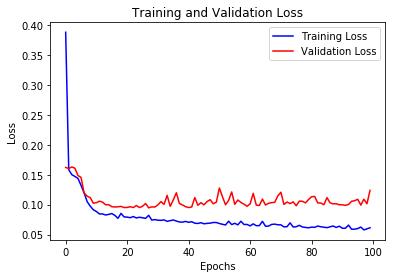

In [11]:
plt.plot(epoch_range, training_loss, 'b', label='Training Loss')
plt.plot(epoch_range, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

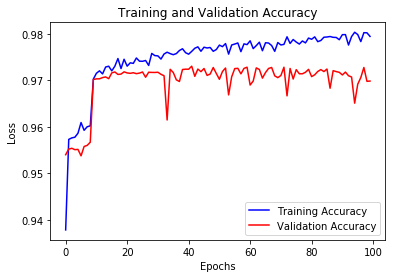

In [12]:
plt.plot(epoch_range, train_acc, 'b', label='Training Accuracy')
plt.plot(epoch_range, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Accuracy')

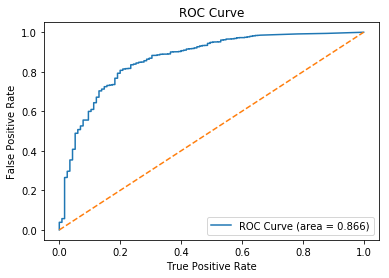

In [13]:
y_pred = []
y_pred = model.predict(x_test)

y_pred_vals = []
y_score = []

for i in range(len(y_pred)):
    val = y_pred[i][-1][0]
    y_score.append(val)
    val_round = np.round(val)
    y_pred_vals.append(val_round)
    
y_true_vals = []
for i in range(len(y_test_reshape)):
    val = y_test_reshape[i][0][0]
    y_true_vals.append(val)
    
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true_vals, y_score)
auc = sklearn.metrics.roc_auc_score(y_true_vals, y_score)

plt.plot(fpr, tpr, label ='ROC Curve (area = %0.3f)'%auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend()